<a href="https://colab.research.google.com/github/cringe-neko-girl/Clip-Bot/blob/main/image_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install requirements

In [1]:
!pip install pillow requests opencv-python cairosvg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00


# Make Image

In [5]:
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
from IPython.display import display, Image as IPImage

class ImageComposer:
    def __init__(self, avatar_url, background_url, font_path='bubbles.ttf'):
        self.avatar_url = avatar_url
        self.background_url = background_url
        self.font_path = font_path
        self.avatar = self.load_image_from_url(avatar_url)
        self.background = self.load_image_from_url(background_url)
        self.avatar_size = (100, 100)  # Adjust size as needed
        self.text = "@owo.uwu_owo.\nPrefix: ...<command_name>"

        if self.avatar.mode != 'RGBA':
            self.avatar = self.avatar.convert('RGBA')
        self.avatar = self.avatar.resize(self.avatar_size)

    def load_image_from_url(self, url):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img

    def get_max_font_size(self, text, max_width, min_size=10, max_size=100):
        for size in range(max_size, min_size - 1, -1):
            font = ImageFont.truetype(self.font_path, size)
            text_bbox = ImageDraw.Draw(Image.new('RGBA', (1, 1))).textbbox((0, 0), text, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            if text_width <= max_width:
                return size
        return min_size

    def create_image(self):
        if self.background_url.lower().endswith('.gif'):
            self.create_animated_gif()
        else:
            self.create_static_image()

    def create_animated_gif(self):
        frames = []
        try:
            while True:
                frame = self.background.copy()
                if frame.mode != 'RGBA':
                    frame = frame.convert('RGBA')

                mask = self.avatar.split()[3]  # Extract the alpha channel from the avatar image

                shader_layer = Image.new('RGBA', frame.size, (0, 0, 0, 0))
                shader_draw = ImageDraw.Draw(shader_layer)
                shader_color = (0, 0, 0, 100)  # Translucent black
                shader_draw.rectangle([(0, 0), (frame.width, frame.height)], fill=shader_color)

                frame = Image.alpha_composite(frame, shader_layer)

                avatar_position = (50, (frame.height - self.avatar_size[1]) // 2)

                text_area_width = frame.width - self.avatar_size[0] - 70  # Adjust for padding
                font_size = self.get_max_font_size(self.text, text_area_width)
                font = ImageFont.truetype(self.font_path, font_size)

                draw = ImageDraw.Draw(frame)
                text_bbox = draw.textbbox((0, 0), self.text, font=font)
                text_width = text_bbox[2] - text_bbox[0]
                text_height = text_bbox[3] - text_bbox[1]
                text_position = (avatar_position[0] + self.avatar_size[0] + 20, (frame.height - text_height) // 2)  # 20 pixels padding between avatar and text

                frame.paste(self.avatar, avatar_position, mask)
                draw.text(text_position, self.text, font=font, fill=(255, 255, 255))  # White color

                frames.append(frame)
                self.background.seek(self.background.tell() + 1)
        except EOFError:
            pass  # End of GIF frames

        gif_path = 'final_image.gif'
        frames[0].save(gif_path, save_all=True, append_images=frames[1:], loop=0, duration=self.background.info['duration'])

        display(IPImage(filename=gif_path))

    def create_static_image(self):
        if self.background.mode != 'RGBA':
            self.background = self.background.convert('RGBA')

        mask = self.avatar.split()[3]  # Extract the alpha channel from the avatar image

        shader_layer = Image.new('RGBA', self.background.size, (0, 0, 0, 0))
        shader_draw = ImageDraw.Draw(shader_layer)
        shader_color = (0, 0, 0, 100)  # Translucent black
        shader_draw.rectangle([(0, 0), (self.background.width, self.background.height)], fill=shader_color)

        final_img = Image.alpha_composite(self.background, shader_layer)

        avatar_position = (50, (final_img.height - self.avatar_size[1]) // 2)

        text_area_width = final_img.width - self.avatar_size[0] - 70  # Adjust for padding
        font_size = self.get_max_font_size(self.text, text_area_width)
        font = ImageFont.truetype(self.font_path, font_size)

        draw = ImageDraw.Draw(final_img)
        text_bbox = draw.textbbox((0, 0), self.text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_position = (avatar_position[0] + self.avatar_size[0] + 20, (final_img.height - text_height) // 2)  # 20 pixels padding between avatar and text

        final_img.paste(self.avatar, avatar_position, mask)
        draw.text(text_position, self.text, font=font, fill=(255, 255, 255))  # White color

        display(final_img)
        final_img.save('final_image.png')


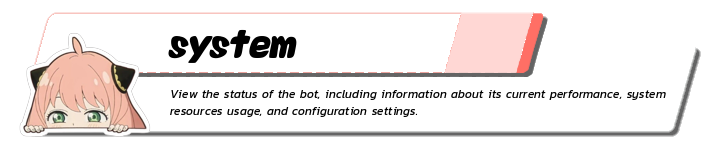

In [37]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
import cv2
from IPython.display import display, Image as IPImage

class Options_ImageGenerator:
    def __init__(self, cog_name, Help_Select_Embed_Mapping):
        """Initialize the ImageGenerator with cog-specific data and load resources."""

        # Configurable values
        self.font_path_header = "valentine.ttf"
        self.font_path_base = "dizhitl-italic.ttf"
        self.character_path = "character.png"
        self.background_path = "background.png"

        # Font sizes
        self.header_font_size = 40
        self.base_font_size = 12

        # Font colors
        self.header_font_color = "black"
        self.base_font_color = "black"

        # Character image scale
        self.character_scale = 0.4

        # Text content
        self.cog_name = cog_name
        self.header_text = f"{cog_name.replace('_', ' ')}"
        self.description_text = self._wrap_text(
            f"{Help_Select_Embed_Mapping.embeds.get(cog_name.lower(), {}).get('description', 'No description available.')}",
            max_width=500
        )

        # Layout positions
        self.character_pos = (5, 5)
        self.text_x_offset = 10
        self.text_y_offset = 25
        self.text_spacing = 20

        # Color replacements
        self.color_replacements_map = {
            'f9fbfa': 'transparent',
            'f8a9a2': 'transparent',  # Replace this color with a solid color
        }

        # Load fonts and images
        self._load_resources()
        self._apply_color_replacements()

    def _load_resources(self):
        """Load the fonts and images required for generating the image."""
        self.header_font = ImageFont.truetype(self.font_path_header, self.header_font_size)
        self.base_font = ImageFont.truetype(self.font_path_base, self.base_font_size)
        self.character = Image.open(self.character_path).convert("RGBA")
        self.background = Image.open(self.background_path).convert("RGBA")

        # Resize character image
        self._resize_character()

    def _resize_character(self):
        """Resize the character image to a percentage of its original size."""
        new_width = round(self.character.width * self.character_scale)
        new_height = round(self.character.height * self.character_scale)
        self.character = self.character.resize((new_width, new_height))

    def _apply_color_replacements(self):
        """Replace specific colors in the background image with colors from replacement images, solid colors, or transparency."""
        bg_array = np.array(self.background)

        for old_hex, replacement in self.color_replacements_map.items():
            old_color = tuple(int(old_hex[i:i+2], 16) for i in (0, 2, 4))
            if replacement == 'transparent':  # If replacement is transparency
                mask = cv2.inRange(bg_array[:, :, :3], np.array(old_color) - 10, np.array(old_color) + 10)
                bg_array[mask > 0] = [0, 0, 0, 0]  # Set the pixels to fully transparent
            elif replacement.startswith('http'):  # Replacement is an image URL
                replacement_img = self._download_image(replacement)
                replacement_img = replacement_img.resize((self.background.width, self.background.height))
                replacement_array = np.array(replacement_img)[:, :, :3]

                mask = cv2.inRange(bg_array[:, :, :3], np.array(old_color) - 10, np.array(old_color) + 10)
                bg_array[mask > 0, :3] = replacement_array[mask > 0]
            else:  # Replacement is a solid color hex code
                replacement_color = tuple(int(replacement[i:i+2], 16) for i in (1, 3, 5))
                mask = cv2.inRange(bg_array[:, :, :3], np.array(old_color) - 10, np.array(old_color) + 10)
                bg_array[mask > 0, :3] = replacement_color

        self.background = Image.fromarray(bg_array, 'RGBA')

    def _wrap_text(self, text, max_width):
        """Wrap text to fit within the specified width."""
        lines = []
        words = text.split()
        current_line = []

        draw = ImageDraw.Draw(Image.new('RGBA', (1, 1)))  # Dummy image to get draw object
        font = ImageFont.truetype(self.font_path_base, self.base_font_size)  # Use base font size

        for word in words:
            current_line.append(word)
            line_width = draw.textbbox((0, 0), ' '.join(current_line), font=font)[2]
            if line_width > max_width:
                current_line.pop()
                lines.append(' '.join(current_line))
                current_line = [word]

        if current_line:
            lines.append(' '.join(current_line))

        return '\n'.join(lines)

    def _draw_text(self, draw, text_x, text_y):
        """Draw all text on the image."""
        # Draw header text
        draw.text((text_x, text_y), self.header_text, font=self.header_font, fill=self.header_font_color)
        text_y += self.header_font.size + self.text_spacing

        # Draw description text
        draw.text((text_x, text_y), self.description_text, font=self.base_font, fill=self.base_font_color)

    def _download_image(self, url):
        """Download an image from a URL."""
        response = requests.get(url)
        response.raise_for_status()  # Ensure we notice bad responses
        return Image.open(BytesIO(response.content)).convert("RGBA")

    def create_image(self):
        """Generate the complete image with the background, character, and text."""
        bg = self.background.copy()
        draw = ImageDraw.Draw(bg)

        # Paste the character image onto the background
        character_x, character_y = self.character_pos
        bg.paste(self.character, (character_x, character_y), self.character)

        # Draw all text onto the image
        text_x = self.character.width + self.text_x_offset
        text_y = self.text_y_offset
        self._draw_text(draw, text_x, text_y)

        return bg

    def save_image(self, file_path):
        """Save the generated image to the given file path."""
        img = self.create_image()
        img.save(file_path)
        return file_path

    def show_image(self):
        """Display the generated image within the notebook (for Jupyter environments)."""
        img = self.create_image()
        img_bytes = BytesIO()
        img.save(img_bytes, format='PNG')
        display(IPImage(img_bytes.getvalue()))


# Create an instance of Options_ImageGenerator
cog_name = "system"

class Help_Select_Embed_Mapping:
    embeds = {
        "system": {
            "title": "System",
            "description": "View the status of the bot, including information about its current performance, system resources usage, and configuration settings.",
            "color": None,  # Customize color as needed
            "thumbnail_url": None,
            "image_url": "https://i.pinimg.com/564x/f4/38/ef/f438ef92875df915c8d019780a76a346.jpg"
        }
    }

# Correctly create an instance of Options_ImageGenerator
image_generator = Options_ImageGenerator(cog_name='system', Help_Select_Embed_Mapping=Help_Select_Embed_Mapping)

# Display the generated image
image_generator.show_image()


Run

In [34]:
# Example usage in a Jupyter Notebook

# Create an instance of Options_ImageGenerator
cog_name = "example_cog"


class Help_Select_Embed_Mapping:
    embeds = {

        "system": {
            "title": "System",
            "description": "View the status of the bot, including information about its current performance, system resources usage, and configuration settings.",
            "color": None,  # Customize color as needed
            "thumbnail_url": None,
            "image_url": "https://i.pinimg.com/564x/f4/38/ef/f438ef92875df915c8d019780a76a346.jpg"
        }
    }

image_generator = Options_ImageGenerator(cog_name='example_cog', Help_Select_Embed_Mapping=Help_Select_Embed_Mapping),

# Display the generated image
image_generator.show_image()


AttributeError: 'tuple' object has no attribute 'show_image'

In [ ]:
!pip install PyQt5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 14.6 MB/s eta 0:00:00


In [ ]:
from PIL import Image, ImageDraw

def create_gradient_background(width, height, start_color, end_color):
    """
    Creates a gradient background image.

    Args:
        width: Width of the image.
        height: Height of the image.
        start_color: Starting color as a tuple (R, G, B, A).
        end_color: Ending color as a tuple (R, G, B, A).

    Returns:
        The created image.
    """

    image = Image.new("RGBA", (width, height), start_color)
    draw = ImageDraw.Draw(image)

    # Calculate color increments for each pixel
    red_inc = (end_color[0] - start_color[0]) / width
    green_inc = (end_color[1] - start_color[1]) / width
    blue_inc = (end_color[2] - start_color[2]) / width
    alpha_inc = (end_color[3] - start_color[3]) / width

    # Draw the gradient
    for x in range(width):
        color = (
            int(start_color[0] + x * red_inc),
            int(start_color[1] + x * green_inc),
            int(start_color[2] + x * blue_inc),
            int(start_color[3] + x * alpha_inc)
        )
        draw.line((x, 0, x, height), fill=color)

    return image

# Example usage
width = 800
height = 600
start_color = (255, 255, 255, 255)  # White
end_color = (0, 0, 0, 255)  # Black

gradient_image = create_gradient_background(width, height, start_color, end_color)
gradient_image.save("gradient_background.png")